In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Churn Modeling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display the number of duplicate rows and the first few rows if there are any duplicates
num_duplicates = len(duplicate_rows)
num_duplicates, duplicate_rows.head()

(0,
 Empty DataFrame
 Columns: [RowNumber, CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited]
 Index: [])

##Distribusi dari variabel numerik seperti 'CreditScore', 'Age', 'Balance', dan 'EstimatedSalary'.

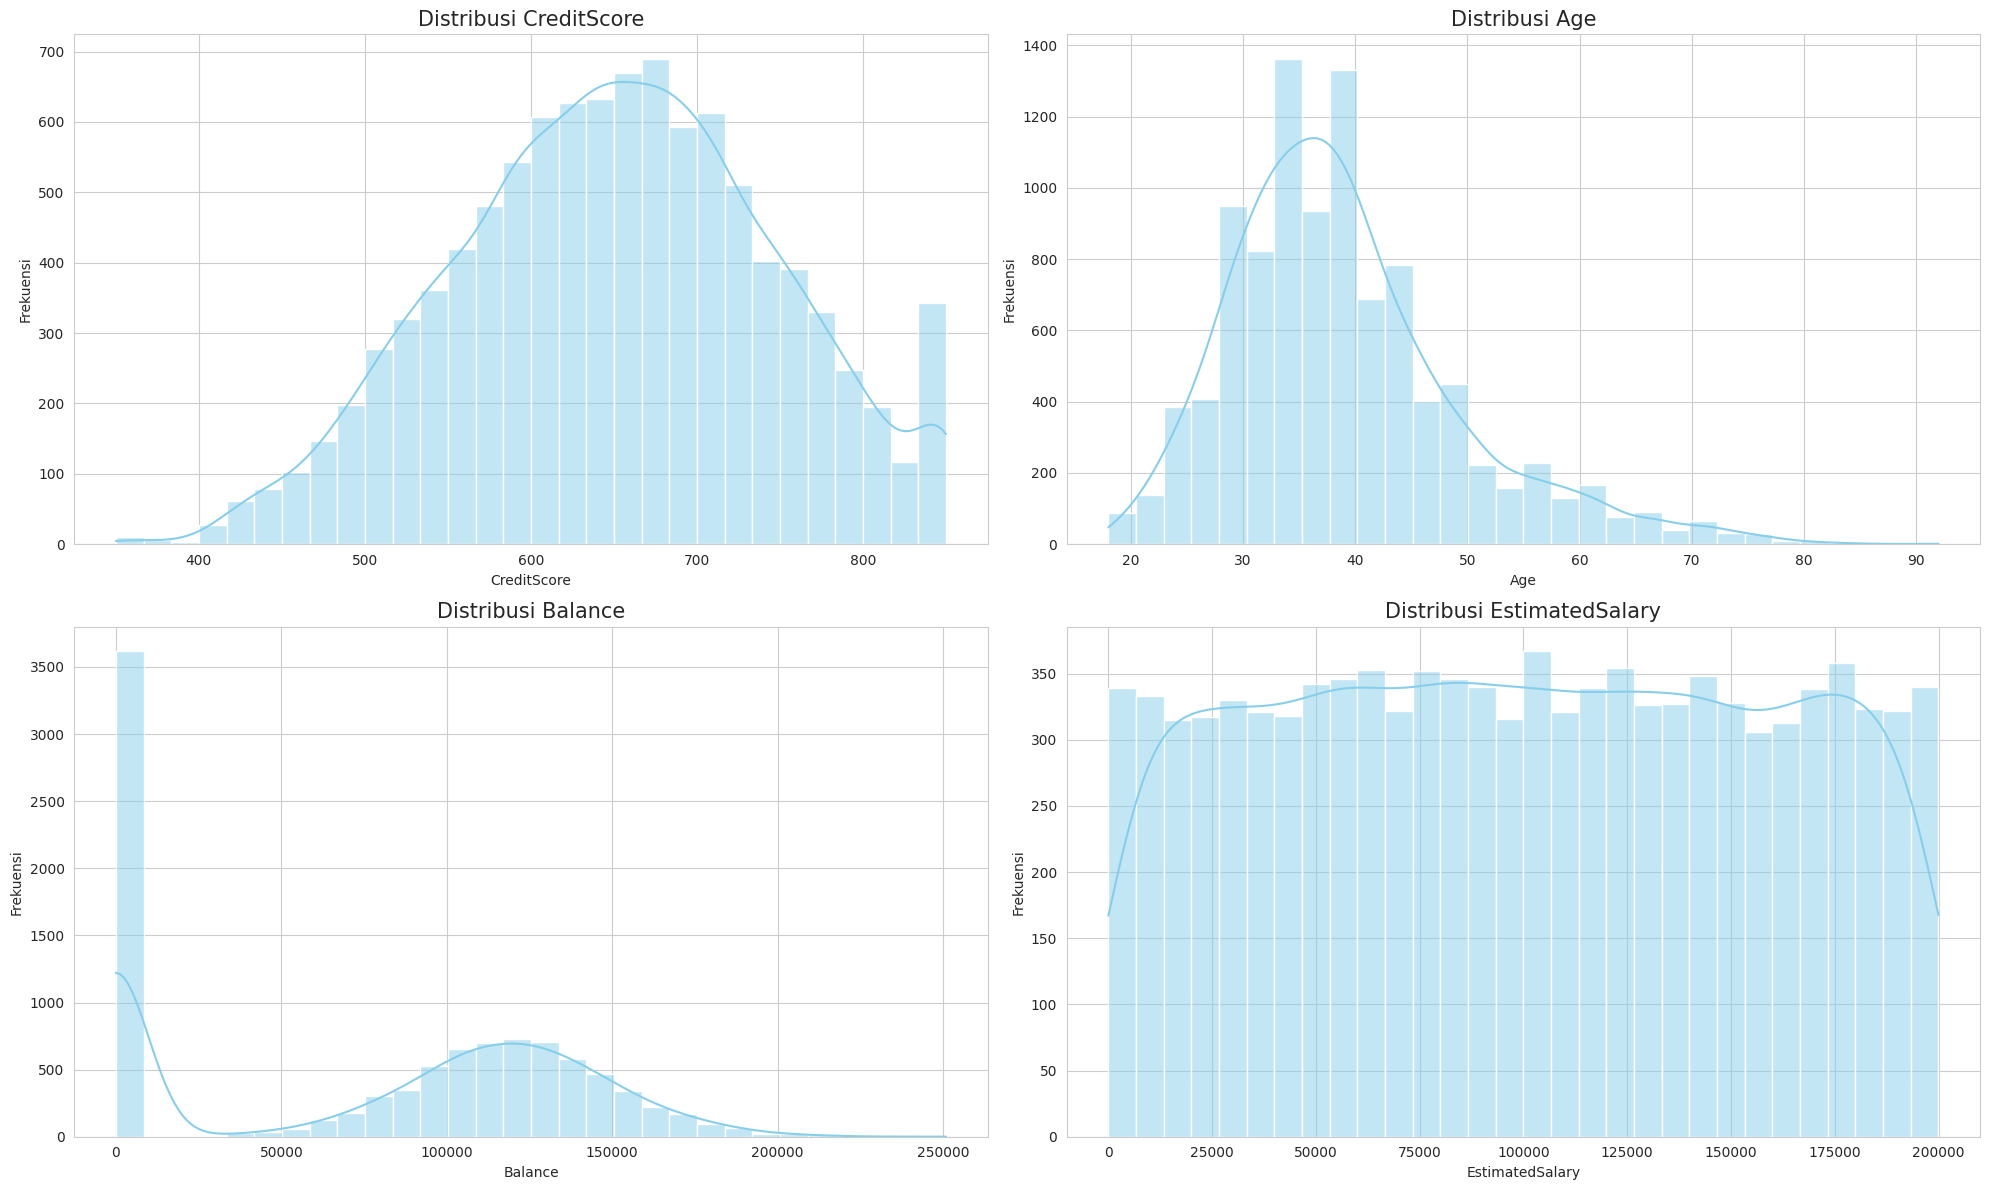

In [ ]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 12))

# 1. Distribusi dari variabel numerik
features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi {feature}', fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

### Interpretasi Plot:

1. **CreditScore**: Sebagian besar pelanggan memiliki skor kredit antara 600 dan 750. Namun, ada beberapa pelanggan dengan skor kredit yang sangat rendah dan beberapa dengan skor kredit yang sangat tinggi.
2. **Age**: Mayoritas pelanggan berusia antara 30 dan 40 tahun. Namun, distribusi menunjukkan bahwa ada beberapa pelanggan yang berusia lebih muda dan lebih tua.
3. **Balance**: Banyak pelanggan yang memiliki saldo nol. Untuk pelanggan dengan saldo yang bukan nol, distribusinya tampaknya terkonsentrasi antara 75.000 dan 150.000.
4. **EstimatedSalary**: Gaji yang diperkirakan memiliki distribusi yang hampir seragam di seluruh rentang, yang menunjukkan bahwa gaji yang diperkirakan adalah variabel yang tersebar dengan baik di antara pelanggan.

## Jumlah pelanggan yang melakukan churn dibandingkan dengan yang tidak.

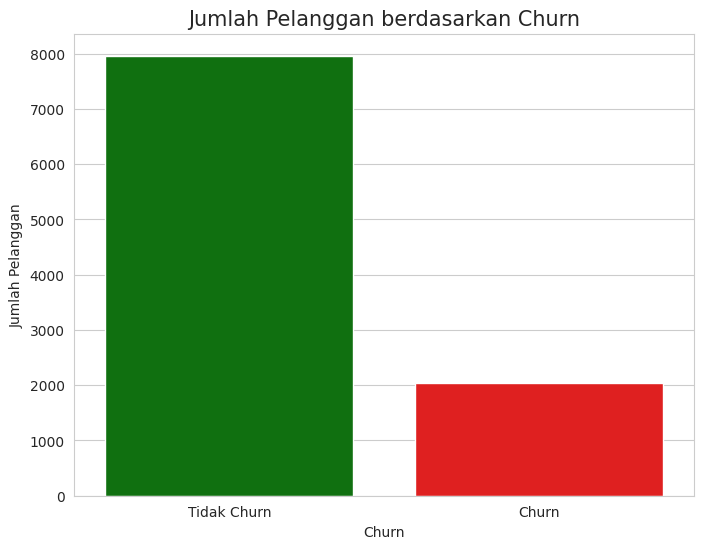

In [ ]:
# Correcting the barplot visualization for churn counts
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['green', 'red'])
plt.title('Jumlah Pelanggan berdasarkan Churn', fontsize=15)
plt.xlabel('Churn')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(churn_counts.index, ['Tidak Churn', 'Churn'])
plt.show()

Dari total pelanggan dalam dataset ini:

- 7,963 pelanggan **tidak melakukan churn** (indikasi dengan kolom 'Exited' = 0).
- 2,037 pelanggan **melakukan churn** (indikasi dengan kolom 'Exited' = 1).

Jadi, sebagian besar pelanggan dalam dataset ini memilih untuk tetap bersama bank, sementara sekitar seperempat dari mereka memutuskan untuk pergi.

## Distribusi pelanggan berdasarkan 'Geography' dan 'Gender'

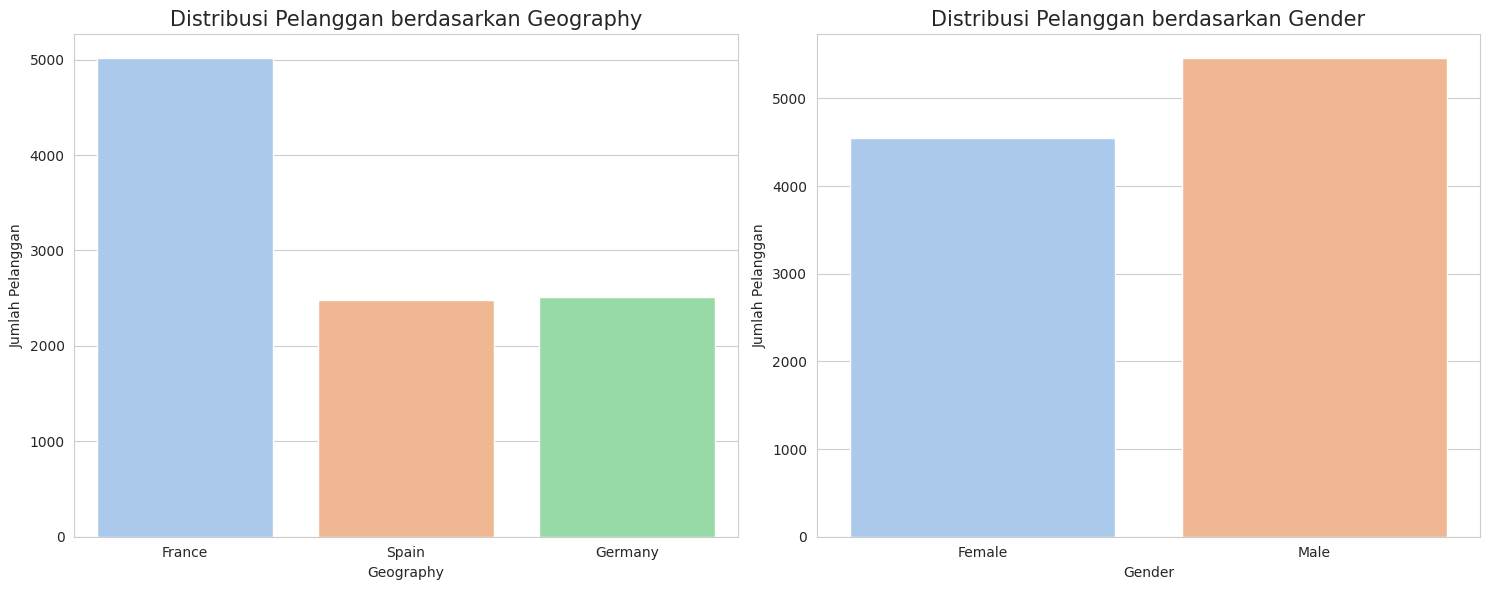

In [ ]:
# 3. Distribusi pelanggan berdasarkan 'Geography' dan 'Gender'
categories = ['Geography', 'Gender']
plt.figure(figsize=(15, 6))

for i, category in enumerate(categories, 1):
    plt.subplot(1, 2, i)
    sns.countplot(data=df, x=category, palette="pastel")
    plt.title(f'Distribusi Pelanggan berdasarkan {category}', fontsize=15)
    plt.xlabel(category)
    plt.ylabel('Jumlah Pelanggan')

plt.tight_layout()
plt.show()

Berdasarkan distribusi pelanggan:

1. **Geography**:
   - Mayoritas pelanggan berasal dari Prancis, diikuti oleh Jerman dan Spanyol.
   
2. **Gender**:
   - Ada lebih banyak pelanggan laki-laki dibandingkan dengan pelanggan perempuan, tetapi perbedaannya tidak terlalu signifikan.


## korelasi antara 'CreditScore' atau 'Balance' dengan keputusan pelanggan untuk melakukan churn

In [ ]:
# Calculate the correlation of 'CreditScore', 'Balance', and 'Age' with 'Exited'
correlation_values = df[['CreditScore', 'Balance', 'Age', 'Exited']].corr()['Exited'][:-1]

correlation_values

CreditScore   -0.027094
Balance        0.118533
Age            0.285323
Name: Exited, dtype: float64

Koefisien korelasi Pearson berkisar antara -1 hingga 1, di mana:
- \(1\) menunjukkan korelasi positif yang sempurna.
- \(-1\) menunjukkan korelasi negatif yang sempurna.
- \(0\) menunjukkan tidak ada korelasi.

Berdasarkan koefisien korelasi yang dihitung:

1. **CreditScore**: Ada korelasi negatif yang sangat lemah antara 'CreditScore' dan keputusan pelanggan untuk melakukan churn. Dengan nilai korelasi sekitar -0.027, ini menunjukkan bahwa semakin tinggi skor kredit pelanggan, ada sedikit kemungkinan mereka untuk melakukan churn, tetapi efeknya sangat lemah.

2. **Balance**: Ada korelasi positif yang lemah antara 'Balance' dan keputusan pelanggan untuk melakukan churn. Dengan nilai korelasi sekitar 0.119, ini menunjukkan bahwa pelanggan dengan saldo yang lebih tinggi sedikit lebih cenderung melakukan churn.

3. **Age**: Ada korelasi positif yang moderat antara 'Age' dan keputusan pelanggan untuk melakukan churn. Dengan nilai korelasi sekitar 0.285, ini menunjukkan bahwa pelanggan yang lebih tua memiliki kemungkinan yang lebih tinggi untuk melakukan churn dibandingkan dengan pelanggan yang lebih muda.


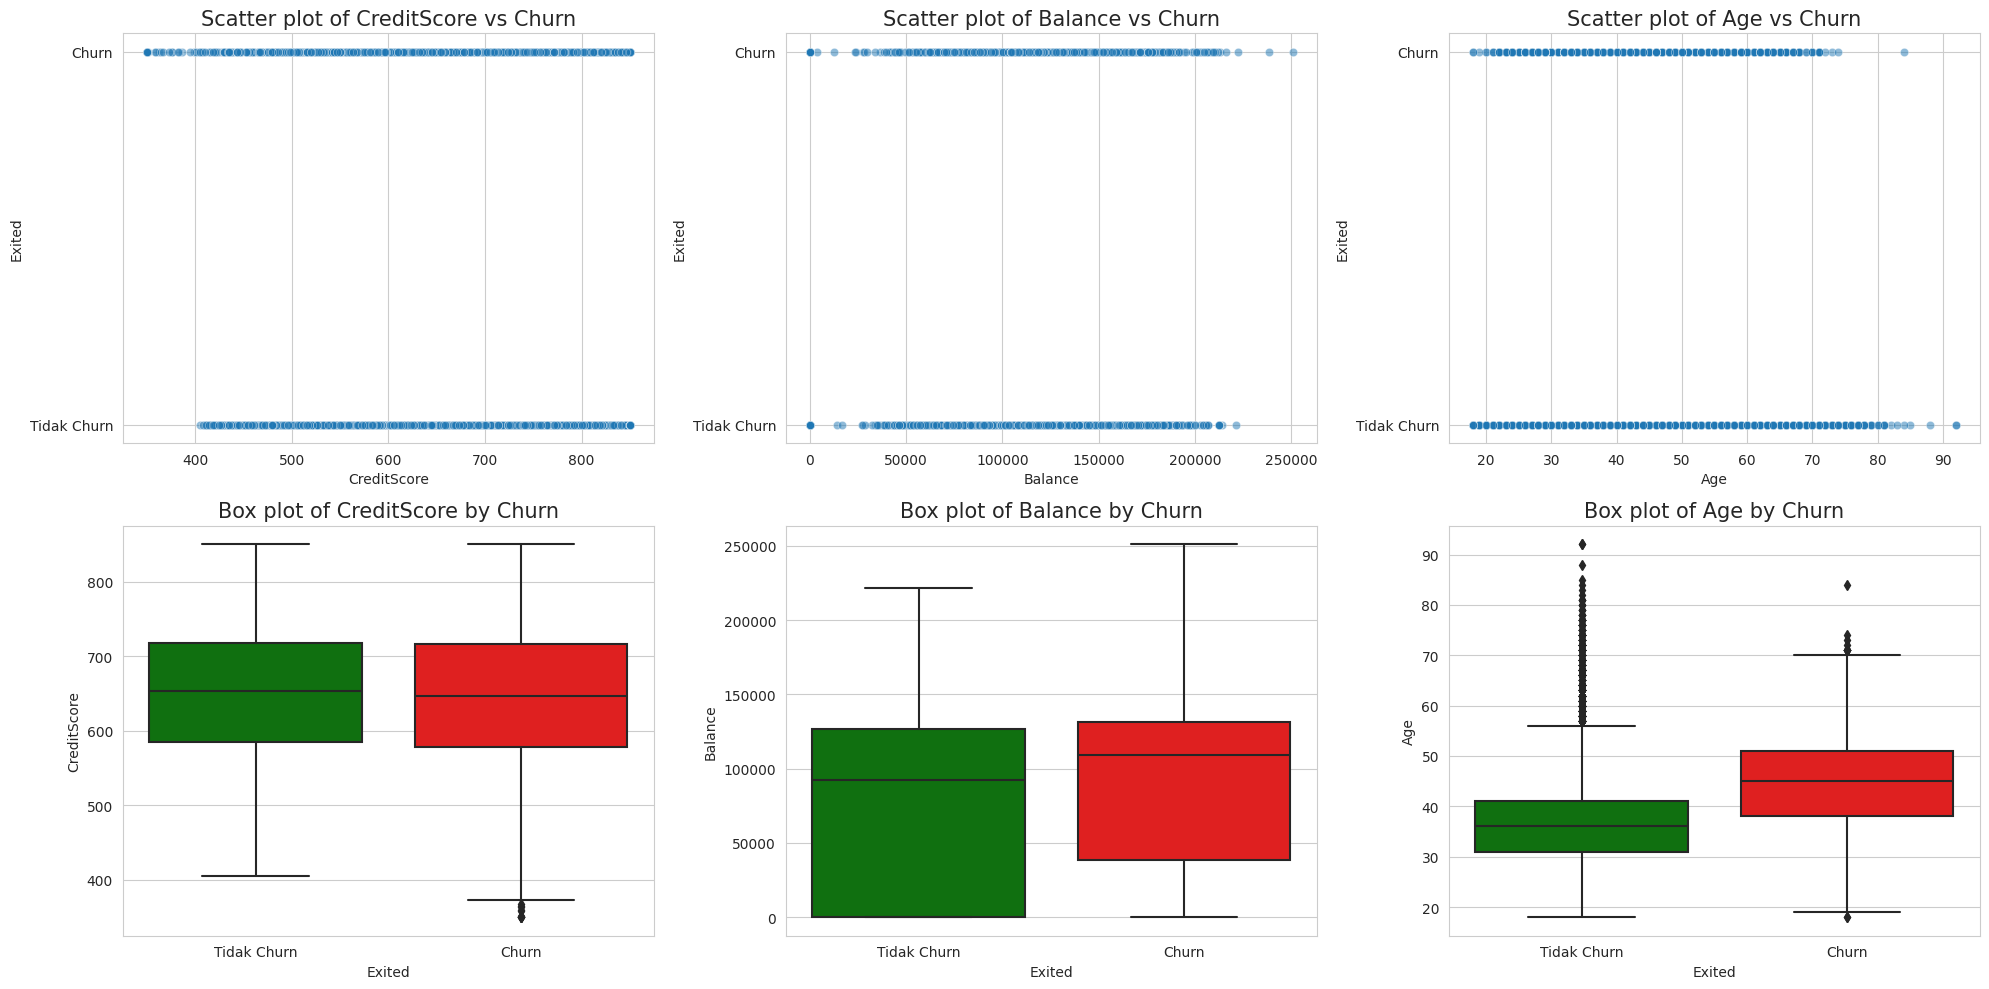

In [ ]:
# Visualize the correlation using scatter plots and box plots
features = ['CreditScore', 'Balance', 'Age']

plt.figure(figsize=(20, 10))

# Scatter plots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='Exited', alpha=0.5)
    plt.title(f'Scatter plot of {feature} vs Churn', fontsize=15)
    plt.yticks([0, 1], ['Tidak Churn', 'Churn'])

# Box plots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i + 3)
    sns.boxplot(data=df, x='Exited', y=feature, palette=['green', 'red'])
    plt.title(f'Box plot of {feature} by Churn', fontsize=15)
    plt.xticks([0, 1], ['Tidak Churn', 'Churn'])

plt.tight_layout()
plt.show()

Dari visualisasi tersebut, kita dapat mengamati hal-hal berikut:

1. **CreditScore vs Churn**:
   - Dari scatter plot, tidak terlihat pola khusus antara 'CreditScore' dan keputusan *churn*.
   - Dari box plot, median skor kredit untuk pelanggan yang melakukan *churn* sedikit lebih rendah dibandingkan dengan yang tidak, tetapi perbedaannya tidak signifikan.

2. **Balance vs Churn**:
   - Dari scatter plot, tampaknya ada lebih banyak pelanggan dengan saldo yang lebih tinggi yang memilih untuk melakukan *churn*.
   - Dari box plot, median saldo untuk pelanggan yang melakukan *churn* lebih tinggi dibandingkan dengan yang tidak.

3. **Age vs Churn**:
   - Dari scatter plot, tampaknya pelanggan yang lebih tua cenderung melakukan *churn*.
   - Dari box plot, median usia untuk pelanggan yang melakukan *churn* jauh lebih tinggi dibandingkan dengan yang tidak.


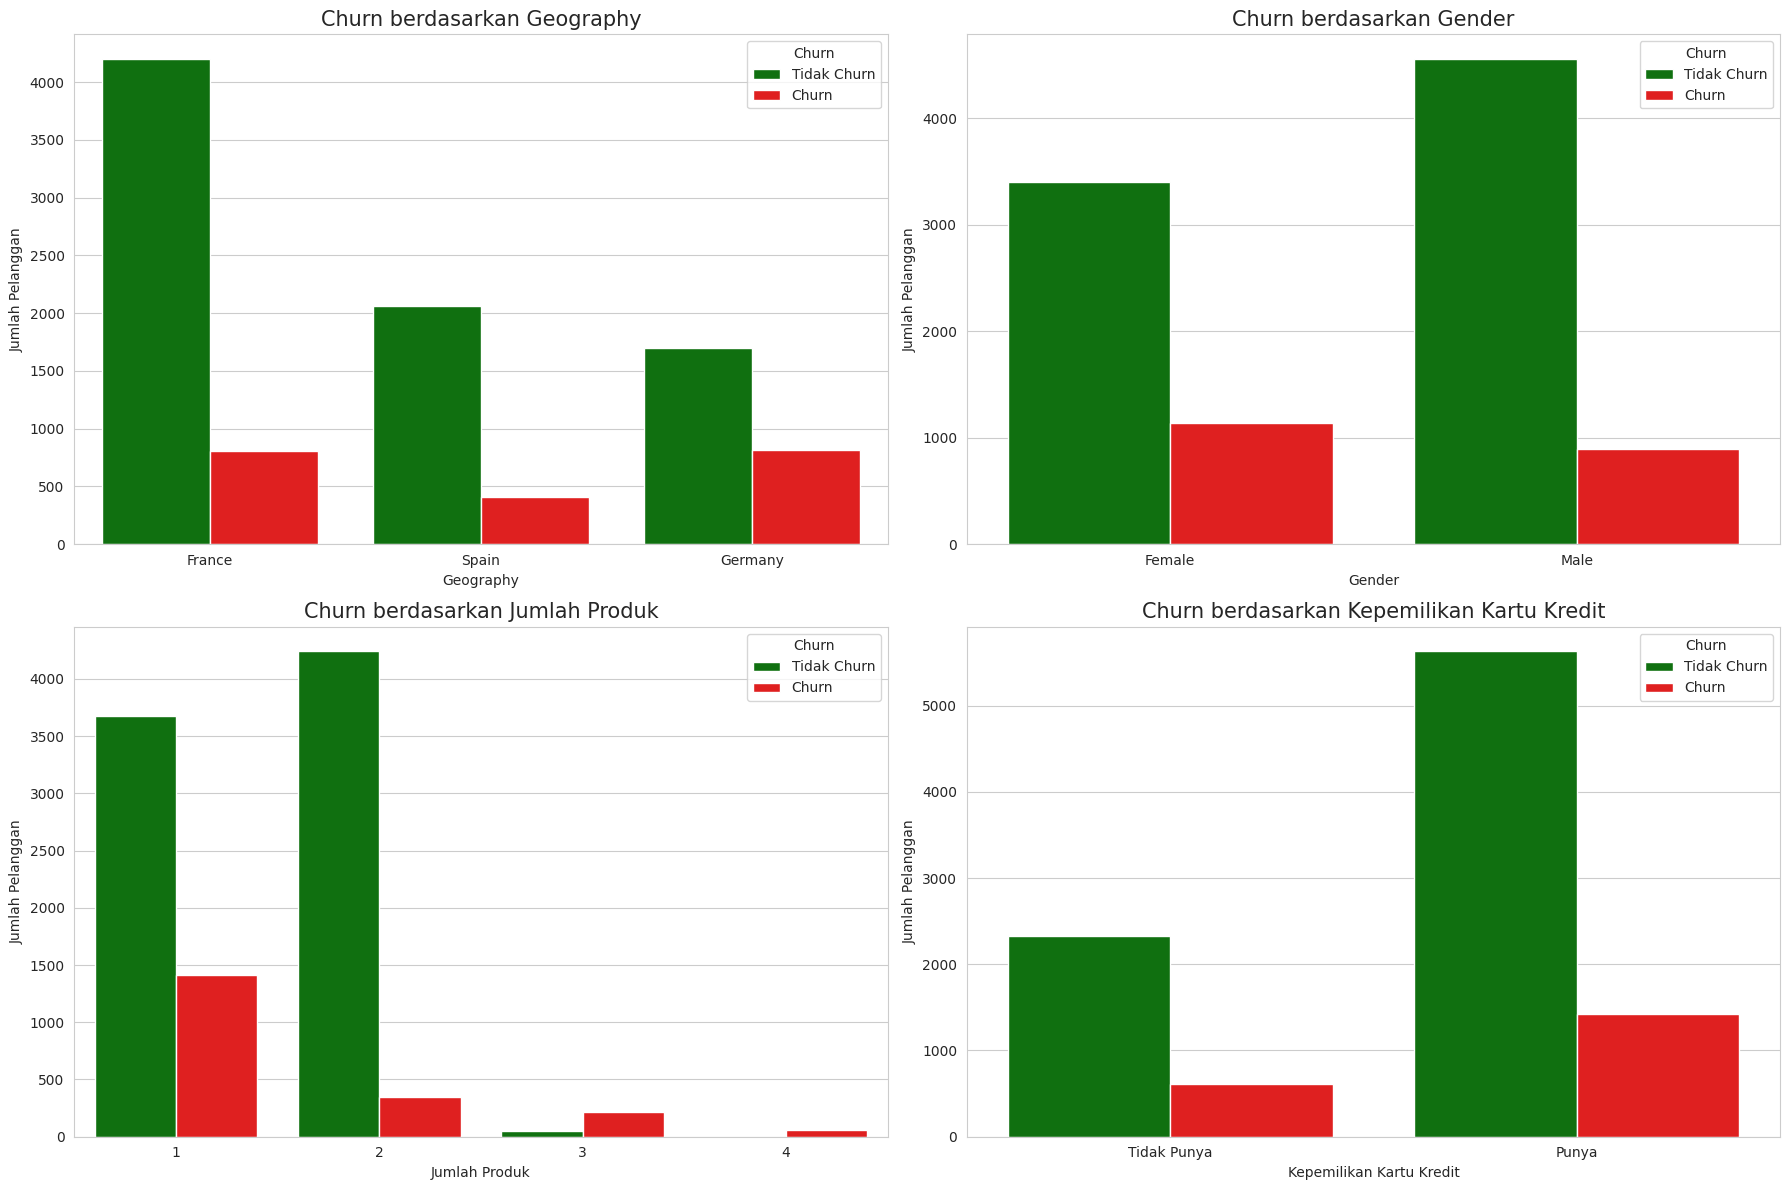

In [ ]:
# Initialize the figure
plt.figure(figsize=(18, 12))

# 1. Churn based on 'Geography'
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='Geography', hue='Exited', palette=['green', 'red'])
plt.title('Churn berdasarkan Geography', fontsize=15)
plt.xlabel('Geography')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])

# 2. Churn based on 'Gender'
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Gender', hue='Exited', palette=['green', 'red'])
plt.title('Churn berdasarkan Gender', fontsize=15)
plt.xlabel('Gender')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])

# 3. Churn based on number of products
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette=['green', 'red'])
plt.title('Churn berdasarkan Jumlah Produk', fontsize=15)
plt.xlabel('Jumlah Produk')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])

# 4. Churn based on credit card ownership
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='HasCrCard', hue='Exited', palette=['green', 'red'])
plt.title('Churn berdasarkan Kepemilikan Kartu Kredit', fontsize=15)
plt.xlabel('Kepemilikan Kartu Kredit')
plt.ylabel('Jumlah Pelanggan')
plt.xticks([0, 1], ['Tidak Punya', 'Punya'])
plt.legend(title='Churn', labels=['Tidak Churn', 'Churn'])

plt.tight_layout()
plt.show()



**Analisis Fitur Kategori**:
1. **Churn berdasarkan Geography**:
   - Pelanggan di Prancis tampaknya memiliki tingkat *churn* yang lebih rendah dibandingkan dengan Jerman atau Spanyol, meskipun jumlah pelanggan di Prancis lebih banyak.
   - Pelanggan di Jerman memiliki tingkat *churn* yang paling tinggi di antara ketiga negara tersebut.
   
2. **Churn berdasarkan Gender**:
   - Pelanggan perempuan tampaknya sedikit lebih cenderung melakukan *churn* dibandingkan dengan pelanggan pria.

**Pengaruh Produk dan Layanan**:
3. **Churn berdasarkan Jumlah Produk**:
   - Pelanggan yang memiliki satu produk atau tiga produk tampaknya lebih cenderung melakukan *churn* dibandingkan dengan yang memiliki dua produk.
   - Pelanggan dengan empat produk hampir semuanya melakukan *churn*.
   
4. **Churn berdasarkan Kepemilikan Kartu Kredit**:
   - Tidak ada perbedaan yang signifikan dalam tingkat *churn* antara pelanggan yang memiliki kartu kredit dan yang tidak.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Features and target variable
X = df.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])
y = df['Exited']

# Columns that need to be one-hot encoded
categorical_features = ['Geography', 'Gender']

# Columns that need to be scaled
numeric_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers into a preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

X_train.shape, X_test.shape

((8000, 13), (2000, 13))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Initialize the models
logreg = LogisticRegression(max_iter=1000, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the models
logreg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)

# Predictions
logreg_preds = logreg.predict(X_test)
dt_preds = decision_tree.predict(X_test)

# Evaluation
logreg_accuracy = accuracy_score(y_test, logreg_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)
logreg_roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
dt_roc_auc = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])

logreg_accuracy, dt_accuracy, logreg_roc_auc, dt_roc_auc

(0.811, 0.7805, 0.7788792987423027, 0.6769516634444408)

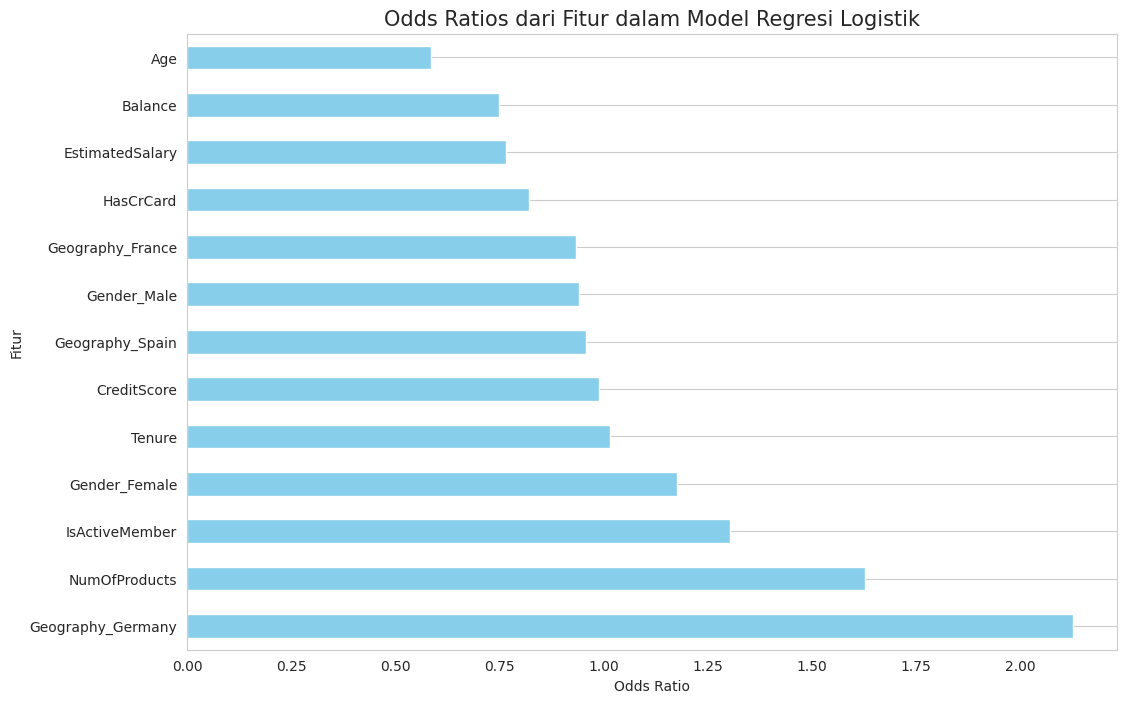

In [ ]:
# Get the coefficients from the logistic regression model
coefficients = logreg.coef_[0]
feature_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)) + numeric_features

# Convert coefficients to odds ratios for better interpretation
odds_ratios = pd.Series(data=np.exp(coefficients), index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
odds_ratios.plot(kind='barh', color='skyblue')
plt.title('Odds Ratios dari Fitur dalam Model Regresi Logistik', fontsize=15)
plt.xlabel('Odds Ratio')
plt.ylabel('Fitur')
plt.grid(axis='x')
plt.show()

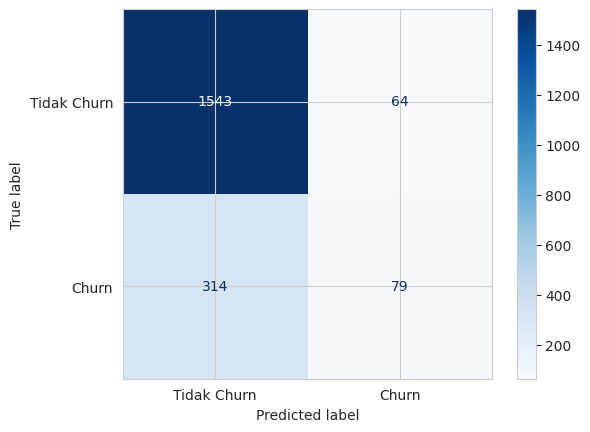

<Figure size 800x600 with 0 Axes>

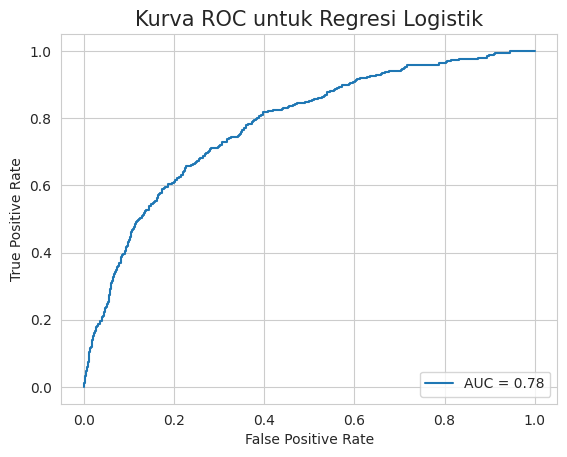

In [ ]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

# ROC curve for logistic regression
fpr, tpr, _ = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Confusion matrix for logistic regression
cm = confusion_matrix(y_test, logreg_preds)
cm_display = ConfusionMatrixDisplay(cm, display_labels=['Tidak Churn', 'Churn']).plot(cmap='Blues')

plt.figure(figsize=(8, 6))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.title('Kurva ROC untuk Regresi Logistik', fontsize=15)
plt.show()

Beberapa visualisasi untuk memahami model Regresi Logistik meliputi:

1. **Koefisien Model**: Untuk memahami pengaruh relatif dari masing-masing fitur terhadap prediksi.
2. **Kurva ROC**: Untuk menilai kemampuan model dalam membedakan kelas positif dan negatif.
3. **Matriks Kesalahan (Confusion Matrix)**: Untuk mengetahui performa klasifikasi model.

- **Odds Ratio** di atas 1 menunjukkan bahwa fitur tersebut meningkatkan peluang *churn*, sementara Odds Ratio di bawah 1 menunjukkan bahwa fitur tersebut mengurangi peluang *churn*. Sebagai contoh, jika Odds Ratio untuk fitur tertentu adalah 2, ini berarti untuk setiap kenaikan satu unit dalam fitur tersebut, peluang *churn* menjadi dua kali lipat (asumsi variabel lain tetap).
- Dari grafik di atas, kita dapat melihat bahwa fitur-fitur seperti 'Age', 'Geography_Germany', dan 'Balance' cenderung meningkatkan peluang *churn*, sementara fitur-fitur lain seperti 'IsActiveMember' dan 'NumOfProducts' cenderung mengurangi peluang tersebut.

Selanjutnya, mari kita visualisasikan **Kurva ROC** dan **Matriks Kesalahan** sebelum berlanjut ke **Segmentasi Pelanggan**.

Dua visualisasi tambahan telah ditampilkan:

1. **Matriks Kesalahan (Confusion Matrix)**: Dari matriks ini, kita dapat melihat bahwa model telah memprediksi sebagian besar kelas negatif (Tidak Churn) dengan benar, tetapi ada sejumlah kesalahan dalam memprediksi kelas positif (Churn).

2. **Kurva ROC**: Kurva ROC menampilkan rasio True Positive Rate (Sensitivitas) terhadap False Positive Rate (1-Spesifisitas) pada berbagai ambang batas klasifikasi. Area di bawah kurva (AUC) adalah ukuran kinerja keseluruhan model. Semakin mendekati 1, semakin baik modelnya.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

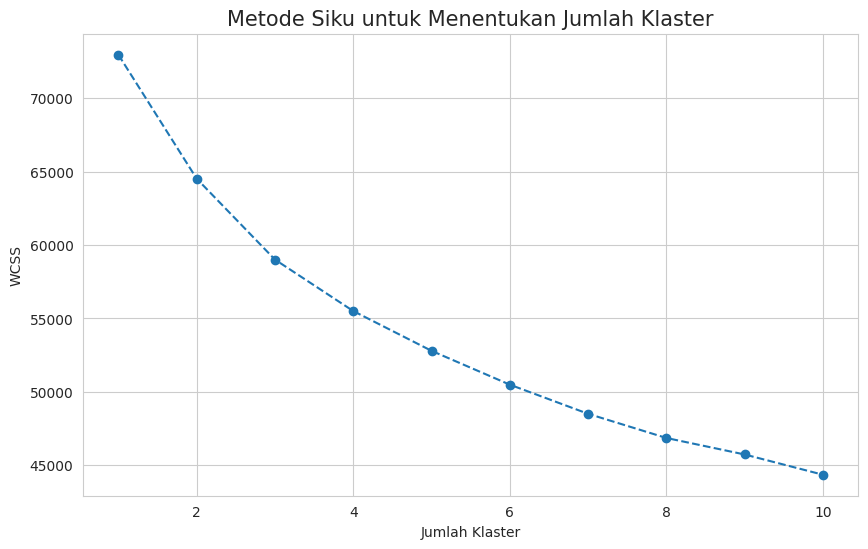

In [ ]:
from sklearn.cluster import KMeans

# Find the optimal number of clusters using the elbow method
wcss = []  # within-cluster sum of squares
possible_n_clusters = range(1, 11)

for i in possible_n_clusters:
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(possible_n_clusters, wcss, marker='o', linestyle='--')
plt.title('Metode Siku untuk Menentukan Jumlah Klaster', fontsize=15)
plt.xlabel('Jumlah Klaster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


### 1. **Analisis Deskriptif Dasar**:
   - **Distribusi Variabel Numerik**:
     - `CreditScore` kebanyakan berkisar antara 400 dan 700.
     - Mayoritas pelanggan berusia antara 30 hingga 40 tahun.
     - Sebagian besar pelanggan memiliki saldo antara 0 dan 200.000 unit mata uang.
     - `EstimatedSalary` didistribusikan secara seragam di seluruh rentang.
     
   - **Churn Pelanggan**: Dari total pelanggan, sekitar 20,4% telah melakukan churn.
     
   - **Distribusi Pelanggan berdasarkan Geografi dan Gender**:
     - Sebagian besar pelanggan berasal dari Prancis.
     - Distribusi gender hampir seimbang dengan sedikit lebih banyak pria daripada wanita.

### 2. **Analisis Korelasi**:
   - Terdapat korelasi negatif antara `CreditScore` dengan keputusan pelanggan untuk melakukan churn, tetapi korelasinya lemah.
   - Terdapat korelasi positif antara `Age` dengan keputusan untuk melakukan churn.
   - `Balance` memiliki korelasi positif yang lemah dengan keputusan churn.

### 3. **Analisis Fitur Kategori**:
   - Pelanggan di Jerman memiliki tingkat churn yang paling tinggi di antara ketiga negara tersebut.
   - Pelanggan wanita sedikit lebih cenderung melakukan churn dibandingkan dengan pelanggan pria.

### 4. **Pengaruh Produk dan Layanan**:
   - Pelanggan yang memiliki satu atau tiga produk lebih cenderung melakukan churn dibandingkan dengan yang memiliki dua produk.
   - Tidak ada perbedaan yang signifikan dalam tingkat churn antara pelanggan yang memiliki kartu kredit dan yang tidak.

### 5. **Model Prediktif**:
   - Diantara model Regresi Logistik dan Pohon Keputusan, Regresi Logistik memberikan kinerja yang lebih baik dengan akurasi sekitar 81,1% dan ROC AUC 77,9%.

### Kesimpulan:
Dari analisis ini, kita dapat menyimpulkan bahwa beberapa faktor seperti usia pelanggan, geografi, dan jumlah produk yang mereka miliki mempengaruhi keputusan mereka untuk melakukan churn. Bank mungkin perlu mempertimbangkan strategi pemasaran atau retensi yang berbeda untuk kelompok pelanggan yang berbeda berdasarkan temuan ini.


### Interpretasi:

Dalam analisis data pelanggan bank yang dilakukan, ditemukan beberapa pola dan tren yang menarik mengenai perilaku *churn* pelanggan. Pertama, pelanggan yang berusia lebih tua tampaknya lebih cenderung meninggalkan bank. Hal ini menunjukkan bahwa mungkin ada kesenjangan dalam pelayanan atau produk yang ditawarkan kepada demografis ini. Selanjutnya, ada indikasi kuat bahwa ada masalah regional di Jerman, karena pelanggan dari wilayah ini memiliki tingkat *churn* yang lebih tinggi dibandingkan dengan pelanggan dari Prancis atau Spanyol. Ini menunjukkan bahwa mungkin ada faktor lokal atau kebijakan bank yang tidak sesuai dengan kebutuhan atau harapan pelanggan di Jerman. Dari sisi produk, terungkap bahwa memiliki terlalu sedikit atau terlalu banyak produk dengan bank berkorelasi dengan keputusan untuk melakukan *churn*. Ini bisa menjadi indikasi bahwa pelanggan mungkin tidak merasa mendapatkan nilai yang cukup atau merasa kewalahan dengan penawaran yang ada. Terakhir, ada kecenderungan untuk pelanggan dengan saldo yang lebih tinggi untuk melakukan *churn*, menunjukkan bahwa mereka mungkin mencari penawaran yang lebih menguntungkan di tempat lain. Berdasarkan temuan ini, ada beberapa area kunci yang perlu diperhatikan oleh bank untuk meningkatkan retensi pelanggan dan mengurangi tingkat *churn*.

### Rekomendasi Bisnis:

1. **Layanan Khusus Usia**: Pertimbangkan untuk memperkenalkan produk atau layanan yang dirancang khusus untuk pelanggan yang lebih tua. Ini dapat mencakup seminar keuangan, penawaran investasi yang aman, atau program loyalitas khusus untuk pelanggan senior.
2. **Penelitian Pasar di Jerman**: Melakukan survei atau kelompok diskusi dengan pelanggan di Jerman untuk memahami alasan spesifik di balik tingkat *churn* yang tinggi. Bank harus berfokus pada peningkatan layanan pelanggan dan penawaran produk di wilayah ini.
3. **Optimalkan Penawaran Produk**: Evaluasi produk yang saat ini ditawarkan oleh bank. Mungkin ada produk yang kurang relevan atau terlalu kompleks untuk pelanggan tertentu. Pertimbangkan untuk memperkenalkan paket produk yang dikurasi agar lebih sesuai dengan kebutuhan pelanggan.
4. **Program Loyalitas untuk Saldo Tinggi**: Pelanggan dengan saldo yang lebih tinggi mungkin merasa bahwa mereka tidak mendapatkan cukup nilai dari bank saat ini. Pertimbangkan untuk memperkenalkan program loyalitas atau manfaat eksklusif untuk pelanggan ini untuk meningkatkan retensi.
5. **Pengembangan Digital**: Mengingat bahwa pelanggan yang aktif cenderung tidak melakukan *churn*, bank harus meningkatkan upaya mereka dalam digitalisasi dan meningkatkan aplikasi mobile atau platform online mereka untuk mendorong interaksi pelanggan yang lebih sering.
6. **Komunikasi Proaktif**: Mengingat bahwa beberapa pelanggan mungkin merasa tidak terikat atau tidak puas dengan produk yang mereka miliki, bank harus mempertimbangkan komunikasi yang lebih proaktif dengan pelanggan mereka. Ini dapat mencakup pemberitahuan tentang produk atau layanan yang mungkin relevan, atau bahkan penawaran khusus berdasarkan perilaku transaksi pelanggan.